<a href="https://colab.research.google.com/github/aryan0147/My_Projects/blob/main/First_ML_Project_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get The Data

In [ ]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2024-09-12 18:27:10--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2024-09-12 18:27:11--  https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia601802.us.archive.org (ia601802.us.archive.org)... 207.241.227.72
Connecting to ia601802.us.archive.org (ia601802.us.archive.org)|207.241.227.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2024-09-12 18:27:11 (566 MB/s) - ‘AgesAndHeights.pkl’ saved [2406/2406]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
raw_data = pd.read_pickle('/content/AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

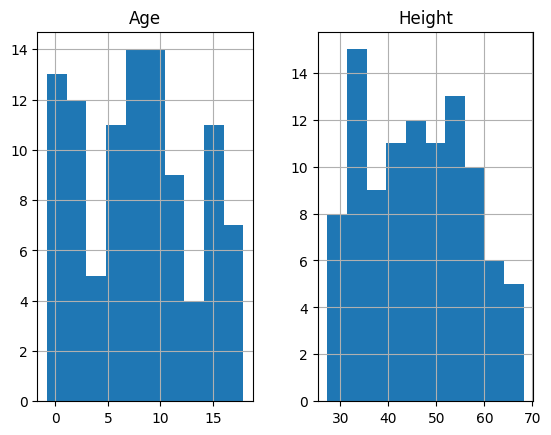

In [ ]:
raw_data.hist()
# problem here is that ages are below 0.

In [ ]:
# Always Check the data.From where ever the data is from.

In [ ]:
# Description of Data
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


Data Cleaning

In [ ]:
# Preparing the data for using.
# get rid of unnesscery data.

In [ ]:
# Like in this data, age less then 0.Is nesscery
clean_df = raw_data[raw_data['Age'] > 0]
clean_df.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [ ]:
clean_df.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


Visualize the cleaned data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

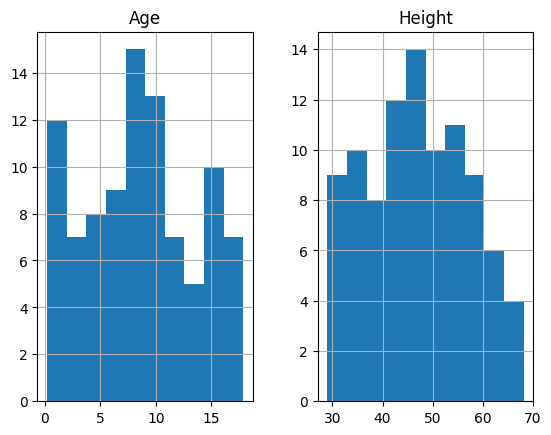

In [ ]:
clean_df.hist()
# Here age prioblem is solved

Text(0, 0.5, 'Height')

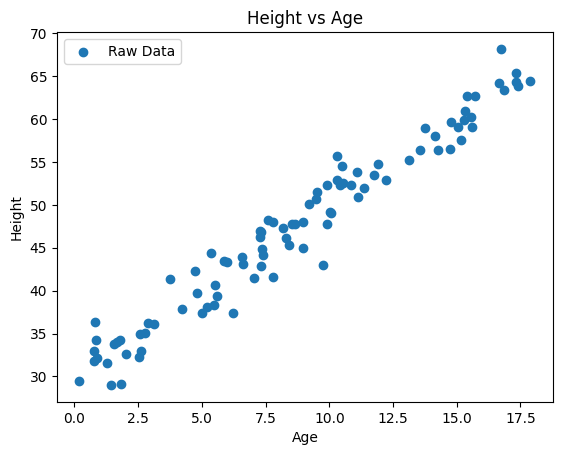

In [ ]:
plt.scatter(clean_df['Age'],clean_df['Height'], label = 'Raw Data')
plt.legend()
plt.title('Height vs Age')
plt.xlabel('Age')
plt.ylabel('Height')
# plt.plot(clean_df['Age'], clean_df['Height'])

Build the Mode, and Train it!!!

 - alpha is height and beta is age
 - y = alpha + beta * x + epsilon
 - y_hat = alpha + beta * x

In [ ]:
# untrained parameters eg
parameters = {'alpha':40, 'beta':4}

In [ ]:
# Model guess
def y_hat(age,params):
  return params['alpha'] + params['beta'] * age

y_hat(5, parameters)

60

In [ ]:
# For the Model.
def learn_parameters(data, params):
  x, y = data['Age'],data['Height']
  x_bar, y_bar = x.mean(), y.mean()
  x, y = x.to_numpy(), y.to_numpy()
  beta = sum( ((x-x_bar) * (y-y_bar)) /sum((x-x_bar) ** 2))
  alpha = y_bar - beta * x_bar
  params['alpha' ] = alpha
  params ['beta' ] = beta

In [ ]:
# Trained Parameters
new_parameters = {'alpha' : 0 , 'beta' : 0}
learn_parameters(clean_df, new_parameters)
new_parameters

{'alpha': 29.96185761461583, 'beta': 2.0014168989106316}

In [ ]:
# untrained parameters
spaced_ages = list(range(18))
spaced_untrained_parameters = [y_hat(x, parameters) for x in spaced_ages]
spaced_untrained_parameters

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108]

Text(0, 0.5, 'Height')

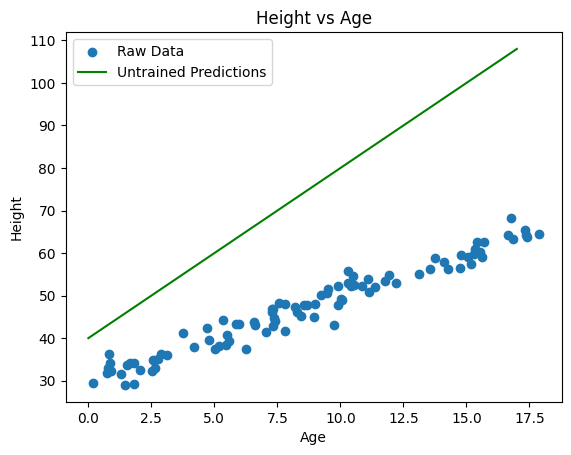

In [ ]:
# Old Parameters
plt.scatter(clean_df['Age'],clean_df['Height'], label = 'Raw Data')
plt.plot(spaced_ages, spaced_untrained_parameters, label = 'Untrained Predictions', color = 'green')

plt.legend()
plt.title('Height vs Age')
plt.xlabel('Age')
plt.ylabel('Height')

In [ ]:
# Trained parameters
spaced_trained_parameters = [y_hat(x, new_parameters) for x in spaced_ages]
spaced_trained_parameters

[29.96185761461583,
 31.96327451352646,
 33.96469141243709,
 35.966108311347725,
 37.96752521025836,
 39.96894210916899,
 41.97035900807962,
 43.97177590699025,
 45.97319280590088,
 47.97460970481151,
 49.97602660372215,
 51.97744350263278,
 53.97886040154341,
 55.98027730045404,
 57.98169419936467,
 59.9831110982753,
 61.984527997185936,
 63.98594489609657]

In [ ]:
spaced_ages

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Text(0, 0.5, 'Height (Inches)')

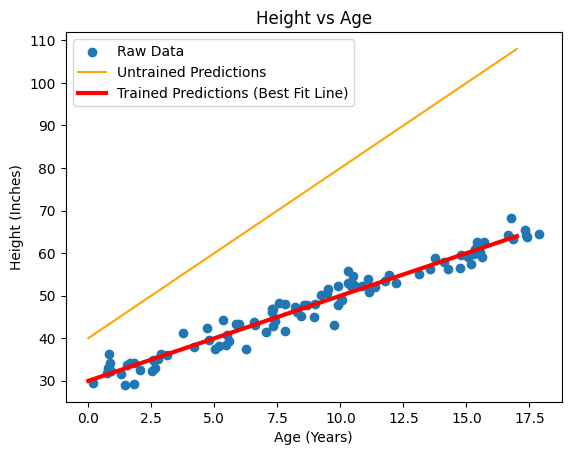

In [ ]:
plt.scatter(clean_df['Age'],clean_df['Height'], label = 'Raw Data')
plt.plot(spaced_ages, spaced_untrained_parameters, label = 'Untrained Predictions', color = 'orange')
plt.plot(spaced_ages, spaced_trained_parameters, label = 'Trained Predictions (Best Fit Line)', color = 'Red', lw = 3)

plt.legend()
plt.title('Height vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Inches)')

Use the Model - Make some predictions on UNSEEN data (Testing)

In [ ]:
new_age = 5 # Input
y_hat(new_age, new_parameters) # Output

39.96894210916899